# Multilayer Perceptron

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [2]:
iris = load_iris()

X = iris.data
y = iris.target

## Preprocessing the data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019)

In [4]:
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Training the Multilayer Perceptron

In [5]:
mlp = MLPClassifier(max_iter=10000, learning_rate_init=0.001, activation='tanh',
                    hidden_layer_sizes=(100,), solver='sgd', alpha=0.0001, random_state=2019)

In [6]:
mlp.fit(X_train_std, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=2019, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## Metrics

In [7]:
y_pred = mlp.predict(X_test_std)

In [8]:
print(f'Accuracy: {accuracy_score(y_test, y_pred): .4f}')

Accuracy:  0.9556


In [9]:
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')

Confusion Matrix:
 [[18  1  0]
 [ 0  9  1]
 [ 0  0 16]]


In [10]:
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.90      0.90      0.90        10
           2       0.94      1.00      0.97        16

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



### Cross Validation

In [11]:
cross_val_score(mlp, X_std, y, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.8       , 1.        , 1.        , 1.        ])

# Modeling two features

In [12]:
X_=iris.data[:,[2,3]]

In [14]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y, test_size=0.3, random_state=2019)

In [15]:
sc_ = StandardScaler()
X_std_ = sc_.fit_transform(X_)
X_train_std_ = sc_.transform(X_train_)
X_test_std_ = sc_.transform(X_test_)

In [16]:
mlp_ = MLPClassifier(max_iter=1000, learning_rate_init=0.001, activation='tanh', hidden_layer_sizes=(100,), solver='lbfgs', alpha=0.0001, random_state=2019)
mlp_.fit(X_train_std_, y_train_)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=2019, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## Plotting Decision Boundaries

In [17]:
import Plotting_Decision_Boundaries as pdb

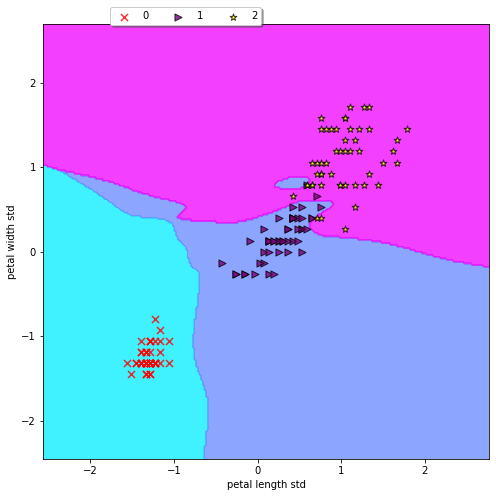

In [18]:
pdb.plotting_db(X=X_std_,y=y,classifier=mlp_)

## Reference

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html